In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

#  the point of the task is more about how l1 vs l2 regularization methods handle correlated features, 
# rather than recovering the true weights
# e.g. how quickly and in what order they set them to 0 when increasing alpha

In [2]:
#Consider the following toy dataset with pairs of correlated features:

def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4)) 

    # '@' — matrix multiplication
  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 84.90it/s]


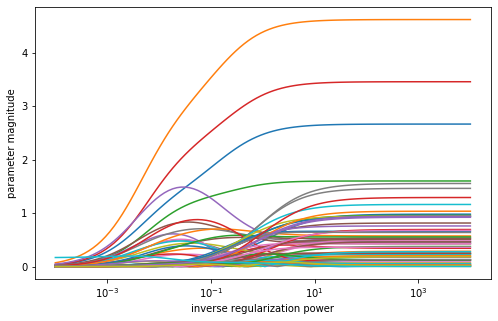

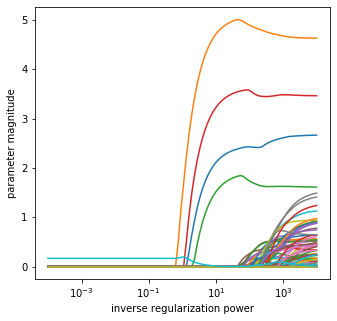

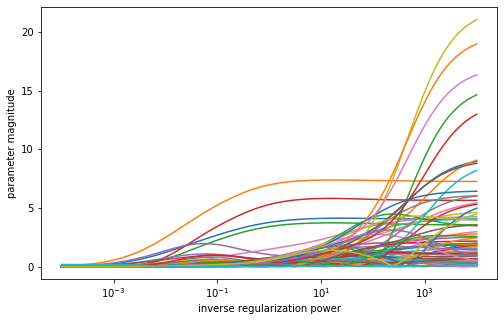

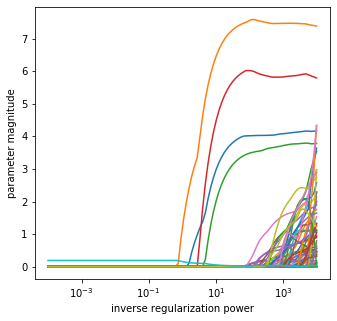

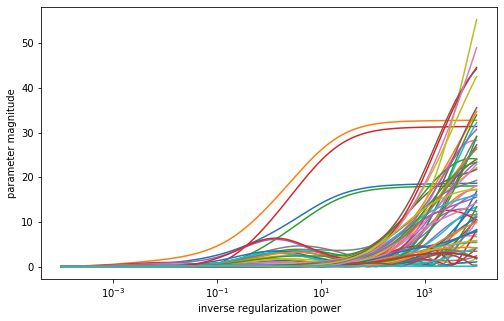

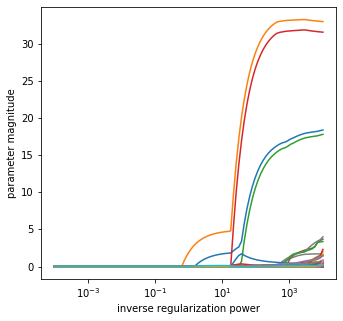

In [22]:
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

for correlation in [0.1, 0.5, 0.9]:
    # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)
    
    # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)
    
    # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []
    
    for alpha in tqdm(alpha_values):
        
        #check Ridge
        linear_model = Ridge(alpha=alpha)
        model = make_pipeline(PolynomialFeatures(4, include_bias=False), linear_model)
        model.fit(X, y)
        
        params_ridge.append(np.append(linear_model.coef_, linear_model.intercept_))
        
        #Check Lasso
        linear_model_2 = Lasso(alpha=alpha, max_iter=1000000)
        model_2 = make_pipeline(PolynomialFeatures(4, include_bias=False), linear_model_2)
        model_2.fit(X, y)
        
        params_lasso.append(np.append(linear_model_2.coef_, linear_model_2.intercept_))
    
    
    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)
    
    # Plotting all the stuff
    
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 2)
    plt.plot(1. / alpha_values, np.abs(params_ridge));
    plt.xlabel("inverse regularization power")
    plt.ylabel("parameter magnitude")
    plt.xscale('log')
    
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 2)
    plt.plot(1. / alpha_values, np.abs(params_lasso));
    plt.xlabel("inverse regularization power")
    plt.ylabel("parameter magnitude")
    plt.xscale('log')
    
